<center><h1>Spotify Genre Classification</h1></center>
<hr>

## References

> [Pandas: UTF-8 Encoding Not Working - user encoding cp1252](https://stackoverflow.com/questions/49561407/utf-8-error-when-opening-csv-file-in-pandas-on-mac)<br>
> [Pandas: Rename the portion of columns - df.rename](https://stackoverflow.com/questions/36342689/changing-part-of-a-column-name-in-pandas)<br>
> [Matplotlib: Draw Piechar - pyplot.piechar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)<br>
> [Matplotlib: Title Text Size](https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib)<br>
> [Matplotlib: 3D Scatter Plot](http://localhost:8888/notebooks/Top%20Spotify%20Songs%20from%202010%202019%20by%20Year/Spotify%20Genre%20Classification.ipynb#5.1)<br>
> [sci-kit learn: Stratify for train-test-split](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn)<br>
> [sci-kit learn: train-test-split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)<br>
> [sci-kit learn: One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)<br>
> [sci-kit learn: PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)<br>

## Table of Contents <a id="top"></a>
1. [Task Objectives](#1)
2. [Data Description](#2)
3. [Data Cleaning](#3)
    1. [Import Library](#3.1)
    2. [Load Data](#3.2)
    3. [Basic Information](#3.3)
4. [Exploratory Data Analysis](#4)
    1. [Boxplot Columns](#4.1)
    2. [Genre Distribution](#4.2)
    3. [Correlation of Features](#4.3)
    4. [PCA](#4.4)
5. [Data Modeling](#5)
    1. [Making Dataset](#5.1)
    2. [Statistical Modeling](#5.2)

<hr>

# 1. Task Objectives <a id="1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Can we classify the Genre of the songs?**<br><br>
> Spofity Dataset shows various data about a single song, such as liveness, acousticness, and son on. We could think that this aspects maybe become features for genre classification at a glance. For this task, let's see whether we could classify the genre of the song by the features given by spofity

# 2. Data Description <a id="2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **It is from Kaggle Dataset [Top Spotify Songs From 2010-2019 by Year](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)**<br><br>
> Dataset has only the most popular songs with 13 variables. Because it is not full dataset for the songs, maybe not easy to classify Genre by theses features.

<a href="https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year"><img src="./data/static/Data Description.png" alt="Data Description Capture"></a>

# 3. Data Cleaning <a id="3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

## 3.1. Import Library <a id="3.1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [1]:
# Numerical Data
import numpy as np

# Dataframe
import pandas as pd

# Visualization
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

In [2]:
pd.options.display.max_columns = 499
pd.options.display.max_rows = 499
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline

## 3.2. Load Data <a id="3.2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [4]:
spotify_df = pd.read_csv('./data/top10s.csv', encoding='cp1252')

In [5]:
spotify_df.to_csv('./data/top10s_utf8.csv', encoding='utf-8', index=False)

In [6]:
spotify_df = pd.read_csv('./data/top10s_utf8.csv', encoding='utf-8')

In [7]:
spotify_df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [8]:
spotify_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
spotify_df

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## 3.3. Basic Information <a id="3.3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Data Basic Information**<br><br>
> There are no missing values hopefully.

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [10]:
spotify_df.describe(include='all')

,id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603,603,603,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
unique,NaN,584,184,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,I Like It,Katy Perry,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,17,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,302.000000,NaN,NaN,NaN,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,174.215384,NaN,NaN,NaN,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,1.000000,NaN,NaN,NaN,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,151.500000,NaN,NaN,NaN,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,302.000000,NaN,NaN,NaN,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,452.500000,NaN,NaN,NaN,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000


In [11]:
spotify_df.isna().sum()

id           0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

# 4. Exploratory Data Analysis <a id="4"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

## 4.1. Boxplot Columns <a id="4.1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [12]:
def boxplot(dataset):
    BPM_COLUMN_INDEX = 5
    SUBPLOT_ROW = 2
    SUBPLOT_COL = 5
    FIGSIZE = (20, 20)

    columns = dataset.columns[BPM_COLUMN_INDEX:]
    targets = dataset.loc[:, columns]
    
    fig, axes = plt.subplots(SUBPLOT_ROW, SUBPLOT_COL, figsize=FIGSIZE)
    
    for idx, col in enumerate(columns.values):
        r = idx // SUBPLOT_COL
        c = idx % SUBPLOT_COL
        axes[r][c].boxplot(dataset.loc[:, col])
        axes[r][c].set_title('Boxplot on {}'.format(col))
        axes[r][c].set_xlabel('{}'.format(col))

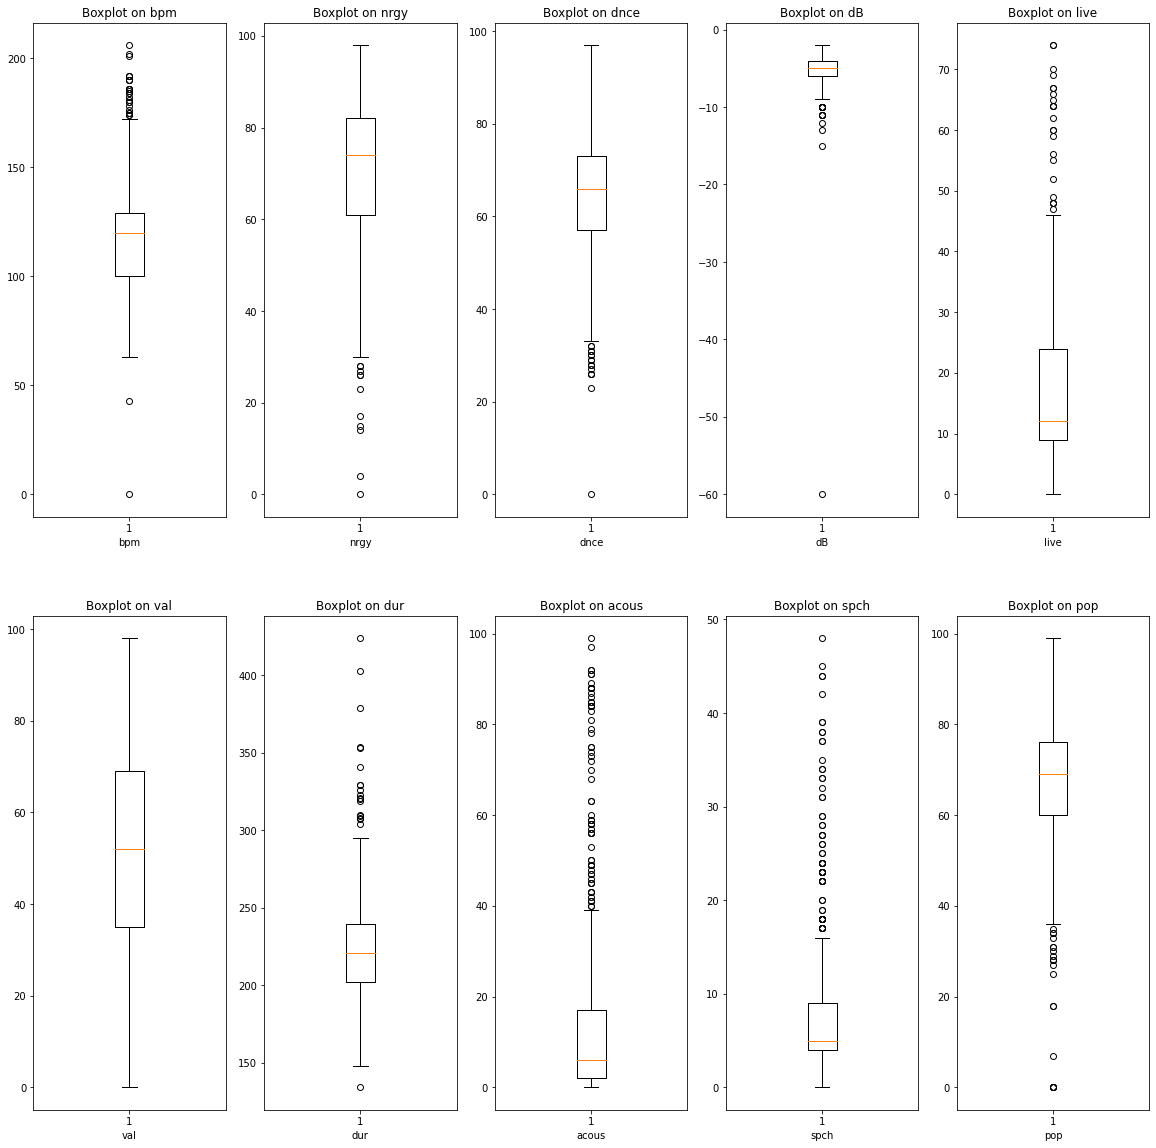

In [13]:
boxplot(spotify_df)

## 4.2. Genre Distribution<a id="4.2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Genre is toooo skewed**<br><br>
> Because the data is biased to pops(xxx-pop), Genre Classification may not be discriminative.

In [14]:
def piechart(dataset):
    FIGSIZE = (30, 30)
    THRESHOLD = 20
    DIVIER = 50
    TEXTSIZE = 20
    
    
    genre_count = dataset.loc[:, 'top genre'].value_counts()
    values = genre_count.values
    labels = genre_count.index
    
    explode = [int(value >= THRESHOLD) / DIVIER for value in values]
        
    plt.figure(figsize=FIGSIZE)
    
    plt.pie(
        values, 
        explode=explode,
        labels=labels,
        autopct='%1.2f%%',
        textprops={'size': TEXTSIZE}
    )
    
    plt.title('Pie Char for Genre Distribution', fontsize=TEXTSIZE)
    plt.show()

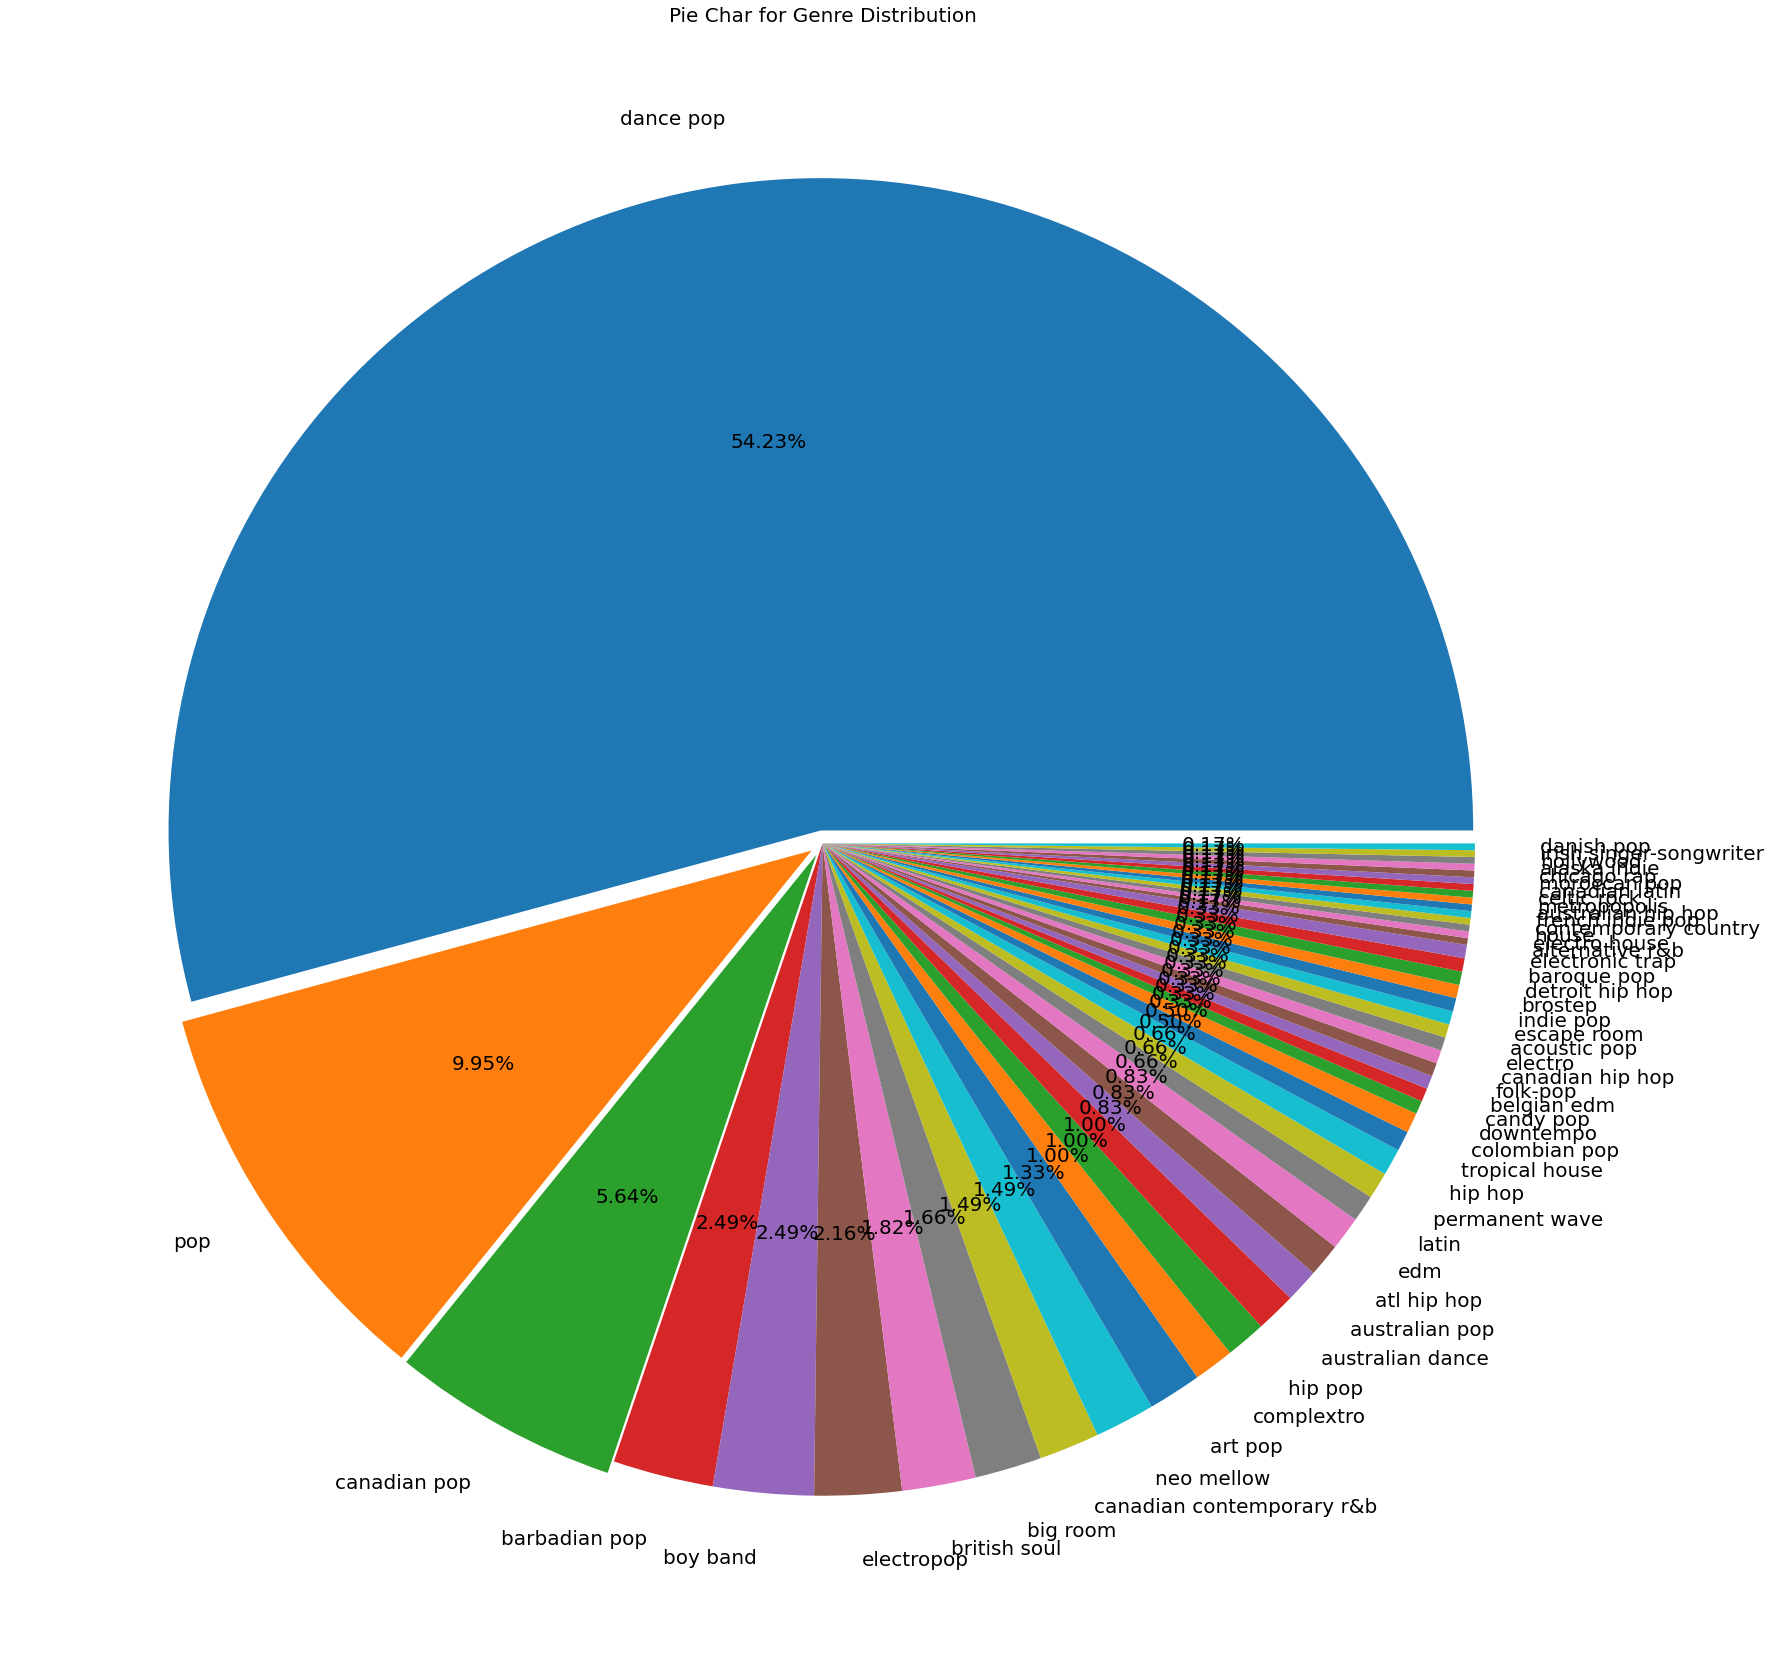

In [15]:
piechart(spotify_df)

## 4.3. Correlation of Features<a id="4.3"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Correlation between Features**<br><br>
> 1. **bpm** has not much effects on the other features<br>
> 2. Higher the **nrgy**, higher the **dB**, **val** , lower the **acous**. High Energy Level means high decibel and positive mood. However this high energy is not made by acoustic sound.<br>
> 3. **dnce** goes with **val**. Able to dance means able to be positive<br>

In [16]:
def heatmap(dataset):
    FIGSIZE = (20, 15)
    
    plt.figure(figsize=FIGSIZE)
    sns.heatmap(dataset.loc[:, 'bpm':].corr(), annot=True)
    plt.title('Heatmap for correlation between Features')
    plt.show()


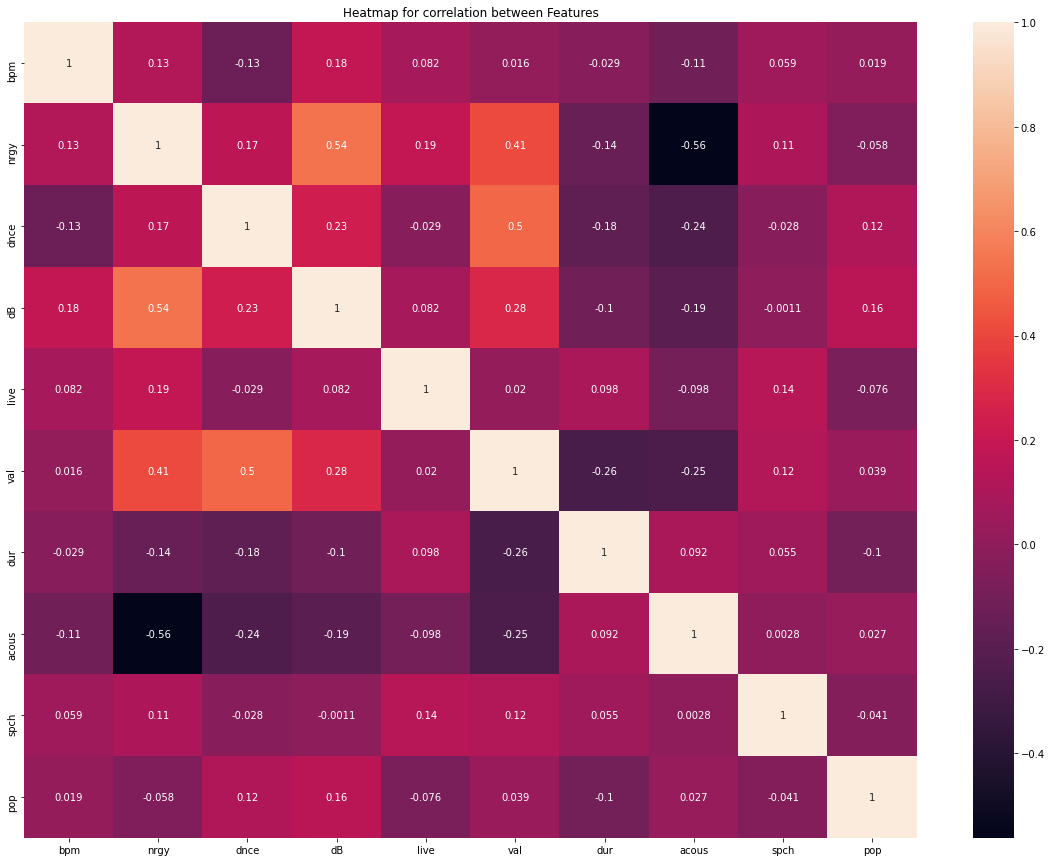

In [17]:
heatmap(spotify_df)

## 4.4. PCA<a id="4.4"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Classification might not work**<br><br>
> After PCA, not a clear discrimination

In [18]:
def pca(dataset):
    features = np.array(dataset.loc[:, 'bpm':])
    model = PCA(n_components=5, copy=False, random_state=2020)
    features_pca = model.fit_transform(features)
    
    print(model.explained_variance_ratio_)
    return model, features_pca

In [19]:
def draw_2d_pca(dataset, features):
    FIGSIZE = (20, 20)
    
    genres = dataset.loc[:, 'top genre']
    genres_count = genres.value_counts()
    
    genre2idx = {genre:idx for idx, genre in enumerate(genres_count.index)}
    
    colormap = cm.Set1.colors
    genre_color = [colormap[genre2idx[genre]] if genre2idx[genre] < 9 else 'lightgrey' for genre in genres]
        
    plt.figure(figsize=FIGSIZE)
    plt.scatter(features[:, 0], features[:, 1], c=genre_color)
    plt.title('2-dimension PCA Results(Top 2 components)')
    plt.xlabel('First PCA Component')
    plt.ylabel('Second PCA COmponent')
    plt.plot()

In [20]:
def draw_3d_pca(dataset, features):
    FIGSIZE = (10, 10)
    
    genres = dataset.loc[:, 'top genre']
    genres_count = genres.value_counts()
    
    genre2idx = {genre:idx for idx, genre in enumerate(genres_count.index)}
    
    colormap = cm.Set1.colors
    genre_color = [colormap[genre2idx[genre]] if genre2idx[genre] < 9 else 'lightgrey' for genre in genres]

    fig = plt.figure(figsize=FIGSIZE)
        
    ax = Axes3D(fig)
    ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=genre_color, s=20)
    
    plt.title('3-dimension PCA Results(Top 3 components)')
    plt.show()

In [21]:
model, features = pca(spotify_df)
print(features.shape)

[0.3539705  0.19343463 0.16710145 0.09819453 0.06031873]
(603, 5)


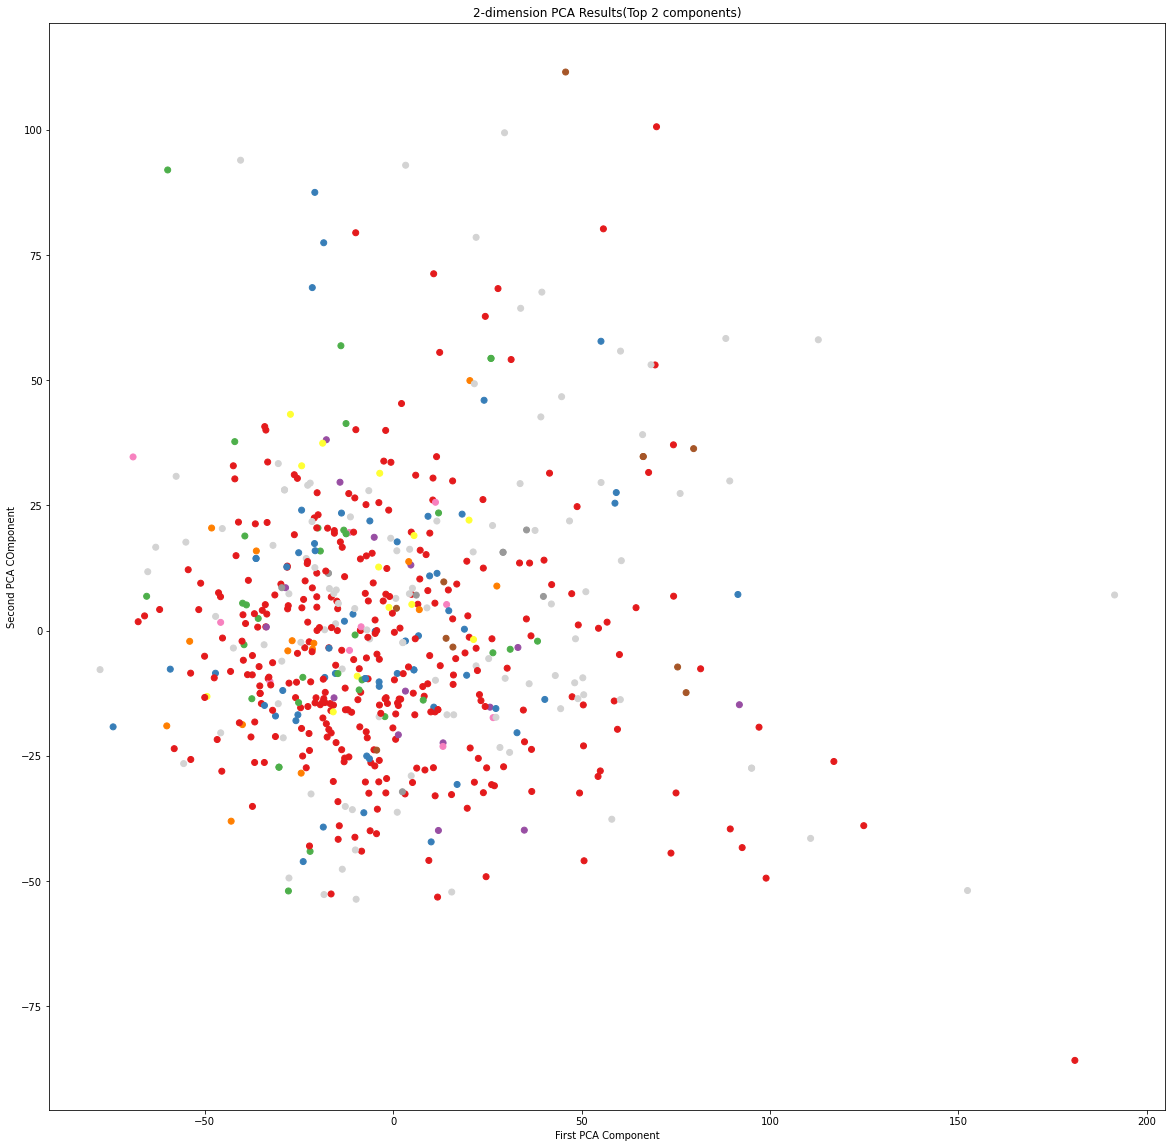

In [22]:
draw_2d_pca(spotify_df, features)

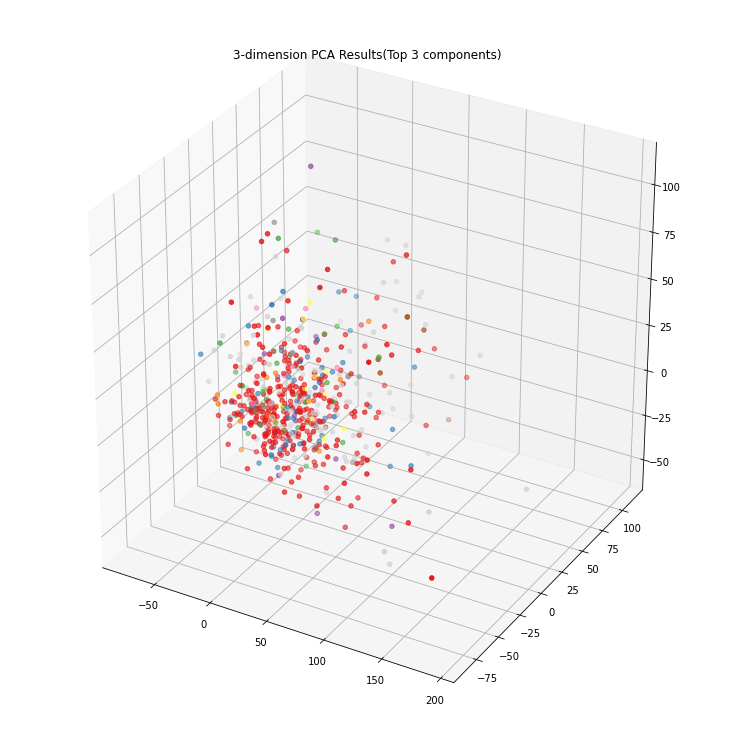

In [23]:
draw_3d_pca(spotify_df, features)

# 5. Data Modeling <a id="5"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

> **Use Statistical Model**<br><br>
> Because dataset is not too large, statistical modeling would be fine. Also the data is biased to pop, therefore only classify top 5 genres.

## 5.1. Making Dataset <a id="5.1"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [24]:
def make_dataset(dataset):
    features = np.array(dataset.loc[:, 'bpm':])
    labels = dataset.loc[:, 'top genre']
    
    label2idx = {label:idx for idx, label in enumerate(labels.value_counts().index[:5])}
    label2idx['other'] = 5

    labels_encoded = labels.apply(lambda label: label2idx[label] if label in label2idx.keys() else 5)  
    labels_encoded = np.array(labels_encoded)
    labels_encoded = np.reshape(labels_encoded, (-1, 1))
    return label2idx, features, labels_encoded

In [25]:
label2idx, features, labels = make_dataset(spotify_df)

In [26]:
label2idx

{'dance pop': 0,
 'pop': 1,
 'canadian pop': 2,
 'barbadian pop': 3,
 'boy band': 4,
 'other': 5}

In [27]:
features.shape

(603, 10)

In [28]:
labels.shape

(603, 1)

In [29]:
def split_train_and_test(features, labels):
    train_features, test_features, train_labels, test_labels = train_test_split(
        features,
        labels,
        test_size=0.1,
        stratify=labels
    )
    
    return train_features, test_features, train_labels, test_labels

In [30]:
train_features, test_features, train_labels, test_labels = split_train_and_test(features, labels)

In [31]:
train_features.shape

(542, 10)

In [32]:
test_features.shape

(61, 10)

In [33]:
train_labels.shape

(542, 1)

In [34]:
test_labels.shape

(61, 1)

In [35]:
def to_onehot(labels, categories='auto'):
    encoder = OneHotEncoder(categories=categories)
    labels = encoder.fit_transform(labels)
    return encoder, labels

In [36]:
encoder, train_labels_onehot = to_onehot(train_labels)

In [37]:
_, test_labels_onehot = to_onehot(test_labels, encoder.categories_)

In [38]:
train_labels_onehot.shape

(542, 6)

In [39]:
test_labels_onehot.shape

(61, 6)

## 5.2. Statistical Modeling <a id="5.2"></a>
<p style="text-align: right;"><a href="#top">🔝Top</a></p>

In [45]:
def svm(features, labels):
    model = SVC(random_state=2020)
    scores = cross_validate(model, features, labels, cv=10, verbose=1, return_train_score=True)
    return model, scores

In [46]:
train_labels_1d = np.reshape(train_labels, (-1))
model_svm, model_scores = svm(train_features, train_labels_1d)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


{'fit_time': array([0.01268291, 0.010782  , 0.01266694, 0.01272488, 0.01066709,
        0.01004791, 0.01005697, 0.01034212, 0.01107812, 0.01020384]),
 'score_time': array([0.00091696, 0.00103331, 0.00114918, 0.00083613, 0.00071597,
        0.00073528, 0.00072813, 0.00078082, 0.0008409 , 0.00070906]),
 'test_score': array([0.54545455, 0.54545455, 0.55555556, 0.55555556, 0.53703704,
        0.53703704, 0.53703704, 0.53703704, 0.53703704, 0.53703704]),
 'train_score': array([0.54209446, 0.54209446, 0.54713115, 0.54098361, 0.54303279,
        0.54303279, 0.54508197, 0.54303279, 0.54508197, 0.54303279])}